In [2]:
import torch
import torch.nn as nn
import numpy as np
from torch.nn import CrossEntropyLoss
import torch.optim as optim
import pandas as pd
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
# Khởi tạo Tensor
# Từ mảng 
data = [[1,2], [3,4]]
# Từ numpy array
data = np.array(([1,2], [3,4]), dtype=float)
x_data = torch.tensor(data)
print(x_data)
print()
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(rand_tensor)
print(ones_tensor)
print(zeros_tensor)

In [ ]:
# Thông số của Tensor
tensor = torch.rand((3,4))

print(tensor.shape)
print(tensor.dtype)
print(tensor.device)


In [ ]:
# Phép toán với Tensor

device = 'cuda' if torch.cuda.is_available() else 'cpu'
tensor = tensor.to(device)
print(tensor.device)

# Chuyển từ numpy sang torch

n = np.ones(5)
t = torch.from_numpy(n)

# Chuyển từ torch sang numpy

t = torch.ones(5)
n = t.numpy()

# torch.autograd

Mạng NN là tập hợp các hàm lồng nhau để thực thi 1 tập input
Các hàm này được xác định bởi weights và bias - trọng số
Các trọng số được lưu dứoi dạng Tensor

Forward: Dự đoán kết quả đầu ra. Input -> L1 -> ... -> Output

Backward: Điều chỉnh trọng số ứng với sai số trong dự đoán
Duyệt ngược từ đầu ra, thu thập đạo hàm của sai số theo gradient, tối ưu hoá bằng giảm gradient

In [13]:
# Activation Function

model = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear(18, 20),
    nn.Linear(20, 5),
    nn.Softmax(dim=-1)
)

a = torch.rand(10).reshape(-1,10)
output = model(a)
print(output)


tensor([[0.1954, 0.1892, 0.1528, 0.2226, 0.2399]], grad_fn=<SoftmaxBackward0>)


# Các bài toán phân loại đơn giản

In [ ]:
# Binary Classification

input_data = torch.tensor(
    np.random.rand(5,6), dtype= torch.float
)
print(f'input data: ', input_data)
print()

model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1),
    nn.Sigmoid()
)

output = model(input_data)
print(f'output: ', output)
# five probs [0, 1] for 5 animals
# class = 1 mammals, class = 0 not mammals

In [ ]:
# Multi-class classification

n_classes = 3
model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,n_classes),
    nn.Softmax(-1)
)

output = model(input_data)
print(f'output: ', [torch.argmax(i) for i in output])
print(f'output: ', output)

In [ ]:
# Regression
model = nn.Sequential(
    nn.Linear(6, 4), # First linear layer
    nn.Linear(4, 1) # Second linear layer
)

output = model(input_data)
print(output)

# Sử dụng Loss function

In [ ]:

# # CrossEntropyLoss

loss = CrossEntropyLoss(output, input_data)
print(loss)

loss.backward()


# Lan truyền ngược

In [ ]:


optimizer = optim.SGD(model.parameters(), lr=0.001)

# Perform parameters updates

optimizer.step()


# Load data

In [ ]:
import torch
from torch.utils.data import TensorDataset

np.random.seed(42)

X = np.random.uniform(low=0, high=2, size=(5,5)).astype(int)
X1 = (np.random.uniform(low=1,high=3,size=(5,1))).astype(int) * 2
X2 = np.random.uniform(low=0, high=2, size=(5,2)).astype(int)

X = np.concatenate((X,X1), axis=1)
X = np.concatenate((X,X2), axis=1)
print(X)

Y = [0, 0, 1, 1, 2]
print(Y)


dataset = TensorDataset(torch.tensor(X), torch.tensor(Y))
input_sample, label_sample = dataset[0]
print(f'input_sample: ', input_sample)
print(f'label_sample: ', label_sample)

In [ ]:
from torch.utils.data import DataLoader
batch_size = 2
shuffle = True
dataloader = DataLoader(dataset, batch_size=batch_size,shuffle=shuffle)

for batch_inputs, batch_labels in dataloader:
    print(f'batch_inputs: ', batch_inputs)
    print(f'batch_lables: ', batch_labels)

# Khởi tạo Layer

In [ ]:
# Khởi tạo Layer bình thường
layer = nn.Linear(64,128)
print(layer.weight.min(), layer.weight.max())

# Khởi tạo Layer uniform
layer = nn.Linear(64,128)
nn.init.uniform_(layer.weight)

print(layer.weight.min(), layer.weight.max())

tensor(-0.1250, grad_fn=<MinBackward1>) tensor(0.1250, grad_fn=<MaxBackward1>)
tensor(0.0002, grad_fn=<MinBackward1>) tensor(1.0000, grad_fn=<MaxBackward1>)


# Reuser Model đã học

In [86]:
model = nn.Linear(5,12)
# Lưu weight
torch.save(model.state_dict(), 'model.pth')

# Tạo cái vỏ mới
new_model = nn.Linear(5,12)
# Load weight
new_model.load_state_dict(torch.load('model.pth', weights_only=True))

print(torch.equal(new_model.weight, model.weight))
print(torch.equal(new_model.bias, model.bias))

True
True


# Fine Tuning
- Learning rate nhỏ
- Đóng băng 1 vài layer
- Đóng bằng layer gần input và fine-tune layer gần output

In [ ]:
model = nn.Sequential(
        nn.Linear(5, 10),
        nn.Linear(10, 5))

# Freeze weight layer 1
for name, param in model.named_parameters():
    if name == '0.weight':
        param.requires_grad = False
for name, param in model.named_parameters():
    print(f"{name}: requires_grad = {param.requires_grad}")

print()

# Freeze layer 1
for param in model[0].parameters():
    param.requires_grad = False
for name, param in model.named_parameters():
    print(f"{name}: requires_grad = {param.requires_grad}")

0.weight: requires_grad = False
0.bias: requires_grad = True
1.weight: requires_grad = True
1.bias: requires_grad = True

0.weight: requires_grad = False
0.bias: requires_grad = False
1.weight: requires_grad = True
1.bias: requires_grad = True


# Train 1 mạng NN

In [88]:
df = pd.read_csv(fr'data_science_salaries.csv')
data = df[['experience_level', 'employment_type', 'work_models', 'company_size', 'salary_in_usd']]
# print(data)
print(df['experience_level'].value_counts())
print()
print(df['employment_type'].value_counts())
print()
print(df['work_models'].value_counts())
print()
print(df['company_size'].value_counts())
print()
print(df['salary_in_usd'].dtype)
# Convert to number
experience_map = {
    'Entry-level': 0,
    'Mid-level': 1,
    'Senior-level': 2,
    'Executive-level': 3
}
df['experience_level_encoded'] = df['experience_level'].map(experience_map)

employment_map = {
    'Full-time': 0,
    'Contract': 1,
    'Part-time': 2,
    'Freelance': 3
}
df['employment_type_encoded'] = df['employment_type'].map(employment_map)

size_map = {
    'Small': 0,
    'Medium': 1,
    'Large': 2
}
df['company_size_encoded'] = df['company_size'].map(size_map)

work_model_map = {
    'On-site': 0,
    'Remote': 1,
    'Hybrid': 2
}

df['work_models_encoded'] = df['work_models'].map(work_model_map)

experience_level
Senior-level       4105
Mid-level          1675
Entry-level         565
Executive-level     254
Name: count, dtype: int64

employment_type
Full-time    6552
Contract       19
Part-time      16
Freelance      12
Name: count, dtype: int64

work_models
On-site    3813
Remote     2561
Hybrid      225
Name: count, dtype: int64

company_size
Medium    5860
Large      569
Small      170
Name: count, dtype: int64

int64


In [ ]:
data = df[['experience_level_encoded', 'employment_type_encoded', 'work_models_encoded', 'company_size_encoded', 'salary_in_usd']]
print(data)

      experience_level_encoded  employment_type_encoded  work_models_encoded  \
0                            1                        0                    1   
1                            1                        0                    1   
2                            2                        0                    1   
3                            2                        0                    1   
4                            1                        0                    0   
...                        ...                      ...                  ...   
6594                         0                        1                    2   
6595                         3                        0                    0   
6596                         2                        0                    2   
6597                         1                        0                    2   
6598                         2                        0                    0   

      company_size_encoded  salary_in_u

In [142]:
# print(df['salary_in_usd'] )
target = df['salary_in_usd']

print("=== DỮ LIỆU TRƯỚC KHI CHUẨN HÓA ===")
print(f"Target - Min: {target.min()}, Max: {target.max()}")
print(f"Target - Mean: {target.mean():.2f}, Std: {target.std():.2f}")

# Chuẩn hoá Z - SCORE THỦ CÔNG
target_mean = target.mean()
target_std = target.std()

target_zscore = (target - target_mean) / target_std


print("=== DỮ LIỆU SAU KHI CHUẨN HÓA ===")
print(f"Target - Min: {target_zscore.min()}, Max: {target_zscore.max()}")
print(f"Target - Mean: {target_zscore.mean():.2f}, Std: {target_zscore.std():.2f}")


=== DỮ LIỆU TRƯỚC KHI CHUẨN HÓA ===
Target - Min: 15000, Max: 750000
Target - Mean: 145560.56, Std: 70946.84
=== DỮ LIỆU SAU KHI CHUẨN HÓA ===
Target - Min: -1.8402590181894627, Max: 8.519610709615424
Target - Mean: -0.00, Std: 1.00


In [ ]:
rate = 8/10

train_sample = 6599 * rate
train_sample = int(train_sample)

train_features = df[['experience_level_encoded', 'employment_type_encoded', 'work_models_encoded', 'company_size_encoded']].iloc[:train_sample]
train_target = target_zscore.iloc[:train_sample]

test_features = df[['experience_level_encoded', 'employment_type_encoded', 'work_models_encoded', 'company_size_encoded']].iloc[train_sample:]
test_target = target_zscore.iloc[train_sample:]


train_dataset = TensorDataset(torch.tensor(train_features.values).float(),
                        torch.tensor(train_target.values).float())
test_dataset = TensorDataset(torch.tensor(test_features.values).float(),
                        torch.tensor(test_target.values).float())

train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=100)

# Model với initialization tốt hơn
model = nn.Sequential(
    nn.Linear(4,16),   # Tăng hidden size
    nn.ReLU(),        # Thêm activation
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,1)
)

# Khởi tạo weights
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)


criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)  # Giảm learning rate

# Test 1 batch để xem thử dữ liệu
sample_batch = next(iter(train_dataloader))
feature_sample, target_sample = sample_batch


print(f"\n=== SAMPLE BATCH ===")
print(f"Feature sample shape: {feature_sample.shape}")
print(f"Target sample shape: {target_sample.shape}")
print(f"Sample features:\n{feature_sample[:3]}")
print(f"Sample targets: {target_sample[:3]}")

# Test prediction với sample
with torch.no_grad():
    sample_pred = model(feature_sample[:3])
    sample_loss = criterion(sample_pred.squeeze(), target_sample[:3])
    print(f"Sample prediction: {sample_pred.squeeze()}")
    print(f"Sample loss: {sample_loss.item()}")


=== SAMPLE BATCH ===
Feature sample shape: torch.Size([100, 4])
Target sample shape: torch.Size([100])
Sample features:
tensor([[1., 0., 0., 1.],
        [2., 0., 0., 1.],
        [2., 0., 0., 1.]])
Sample targets: tensor([-0.7831, -0.2898,  0.1049])
Sample prediction: tensor([-0.4623, -0.7421, -0.7421])
Sample loss: 0.34163951873779297


In [144]:
num_epochs = 10000

loss_arr = []
model.train()
for epoch in range(num_epochs):
    if epoch % 10 == 0:  # Print mỗi 10 epochs để tránh spam
        print(f"Epoch {epoch}")
    for data in train_dataloader:
        # Get features and target from the data loader
        feature, target = data
        # Run forward pass
        pred = model(feature)
        # Compute loss & gradients
        loss = criterion(pred.squeeze(), target)
        loss.backward()
        # Update the parameters
        optimizer.step()
        # Set the gradients to zero
        optimizer.zero_grad()

        loss_arr.append(loss.item())



Epoch 0
Epoch 10
Epoch 20
Epoch 30
Epoch 40
Epoch 50
Epoch 60
Epoch 70
Epoch 80
Epoch 90
Epoch 100
Epoch 110
Epoch 120
Epoch 130
Epoch 140
Epoch 150
Epoch 160
Epoch 170
Epoch 180
Epoch 190
Epoch 200
Epoch 210
Epoch 220
Epoch 230
Epoch 240
Epoch 250
Epoch 260
Epoch 270
Epoch 280
Epoch 290
Epoch 300
Epoch 310
Epoch 320
Epoch 330
Epoch 340
Epoch 350
Epoch 360
Epoch 370
Epoch 380
Epoch 390
Epoch 400
Epoch 410
Epoch 420
Epoch 430
Epoch 440
Epoch 450
Epoch 460
Epoch 470
Epoch 480
Epoch 490
Epoch 500
Epoch 510
Epoch 520
Epoch 530
Epoch 540
Epoch 550
Epoch 560
Epoch 570
Epoch 580
Epoch 590
Epoch 600
Epoch 610
Epoch 620
Epoch 630
Epoch 640
Epoch 650
Epoch 660
Epoch 670
Epoch 680
Epoch 690
Epoch 700
Epoch 710
Epoch 720
Epoch 730
Epoch 740
Epoch 750
Epoch 760
Epoch 770
Epoch 780
Epoch 790
Epoch 800
Epoch 810
Epoch 820
Epoch 830
Epoch 840
Epoch 850
Epoch 860
Epoch 870
Epoch 880
Epoch 890
Epoch 900
Epoch 910
Epoch 920
Epoch 930
Epoch 940
Epoch 950
Epoch 960
Epoch 970
Epoch 980
Epoch 990
Epoch 1000


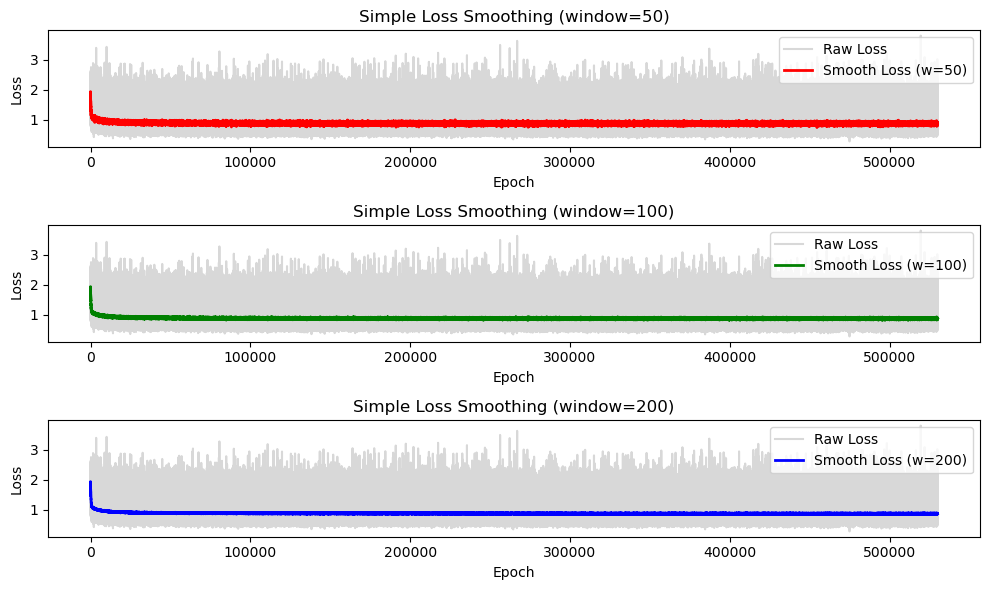

In [145]:
import matplotlib.pyplot as plt

windows = [50, 100, 200]
colors = ['red', 'green', 'blue']
fig, ax = plt.subplots(3, 1, figsize=(10, 6))
def smooth_loss(loss_arr, window):
    """Sử dụng pandas rolling để smooth loss"""
    loss_series = pd.Series(loss_arr)
    smoothed = loss_series.rolling(window=window, min_periods=1).mean()
    return smoothed.values

for i in range(len(windows)):
    smooth_values = smooth_loss(loss_arr, window=windows[i])
    
    ax[i].plot(loss_arr, alpha=0.3, label='Raw Loss', color='gray')
    ax[i].plot(smooth_values, linewidth=2, label=f'Smooth Loss (w={windows[i]})', color=colors[i])
    
    ax[i].legend()
    ax[i].set_title(f'Simple Loss Smoothing (window={windows[i]})')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Loss')

# Gộp lại ngoài vòng lặp
plt.tight_layout()
plt.show()


In [157]:
def denormalize_target(zscore_pred):
    return zscore_pred * target_std + target_mean

predictions_zscore = []
targets_zscore = []

model.eval()
# Tắt gradients
with torch.no_grad():
    # Chạy forward pass
    for features, target in test_dataloader:
        # Chạy forward pass
        pred_zscore = model(features)
        predictions_zscore.extend(pred_zscore)
        targets_zscore.extend(target)

predictions_zscore = np.array(predictions_zscore)
targets_zscore = np.array(targets_zscore)

predictions_actual = denormalize_target(predictions_zscore)
targets_actual = denormalize_target(targets_zscore)

print(f"\n=== SO SÁNH KẾT QUẢ ===")
print("Z-score predictions:", predictions_zscore[:7].reshape(-1))
print("Z-score targets:     ", targets_zscore[:7])
print()
print("Actual predictions:  ", predictions_actual[:7].reshape(-1))
print("Actual targets:      ", targets_actual[:7])


=== SO SÁNH KẾT QUẢ ===
Z-score predictions: [ 0.3220575   0.3220575   0.3220575   0.3220575  -0.44798607 -0.44798607
  0.19428188]
Z-score targets:      [ 0.41495073 -0.36027762  0.30923775 -0.55056095 -0.99455535 -1.2059813
  0.5418063 ]

Actual predictions:   [168409.52 168409.52 168409.52 168409.52 113777.37 113777.37 159344.25]
Actual targets:       [175000.    120000.01  167500.    106500.     75000.01   60000.008
 184000.   ]
